In [59]:
#I did this homework based on explanation in test)tree file uploaded in drive and
#the website https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [2]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import tree  # Import Decision Tree Classifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/home/sedreh/ITMO/semester2/Biopython/10/dogs_n_cats.csv")

In [4]:
data.head(10)
#we need to divide given columns into two types of variables
# 1) dependent(or target variable) 2) independent variable(or feature variables).

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
5,26,31.2,1,0,0,собачка
6,20,24.0,1,1,0,собачка
7,23,27.6,1,1,0,собачка
8,21,25.2,1,1,0,собачка
9,28,33.6,1,1,0,собачка


In [5]:
data.groupby("Вид").aggregate(["count"])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,500,500,500,500,500
собачка,500,500,500,500,500


In [6]:
#Create Decision Tree classifer object
Tree_classifer_object = tree.DecisionTreeClassifier()

In [7]:
Tree_classifer_object

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
#Create Decision Tree classifer object
Tree_classifer_object = tree.DecisionTreeClassifier(criterion='entropy')
Tree_classifer_object

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
#split dataset in features and target variable
feature_cols = ['Длина', 'Высота', 'Шерстист','Гавкает','Лазает по деревьям']
label = ['Вид']
x = data[feature_cols] # Features
y = data[label] # Target variable

In [10]:
#To understand model performance, divide the dataset into a training set and
# a test set by using function train_test_split().
#we need to pass 3 parameters features, target, and test_set size.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)# 70% training and 30% test

print(y_train.loc[y_train["Вид"] == "котик"].count())
print(y_train.loc[y_train["Вид"] == "собачка"].count())

Вид    349
dtype: int64
Вид    351
dtype: int64


In [14]:
#create a Decision Tree Model using Scikit-learn.


# Train Decision Tree Classifer
Tree_classifer_object = Tree_classifer_object.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = Tree_classifer_object.predict(x_test)

print(y_pred)
#estimate how accurately the classifier or model can predict the type of cultivars.
#Accuracy can be computed by comparing actual test set values and predicted values.

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




['котик' 'котик' 'собачка' 'собачка' 'собачка' 'котик' 'собачка' 'котик'
 'собачка' 'собачка' 'собачка' 'собачка' 'котик' 'собачка' 'котик'
 'собачка' 'собачка' 'собачка' 'котик' 'собачка' 'котик' 'собачка' 'котик'
 'котик' 'собачка' 'собачка' 'собачка' 'котик' 'котик' 'собачка' 'котик'
 'котик' 'котик' 'собачка' 'собачка' 'собачка' 'собачка' 'котик' 'котик'
 'котик' 'котик' 'котик' 'собачка' 'собачка' 'собачка' 'котик' 'котик'
 'собачка' 'собачка' 'котик' 'котик' 'собачка' 'котик' 'собачка' 'собачка'
 'собачка' 'котик' 'котик' 'собачка' 'котик' 'собачка' 'собачка' 'собачка'
 'котик' 'котик' 'котик' 'собачка' 'котик' 'котик' 'собачка' 'котик'
 'собачка' 'собачка' 'котик' 'собачка' 'собачка' 'собачка' 'котик'
 'собачка' 'котик' 'собачка' 'котик' 'котик' 'котик' 'котик' 'котик'
 'собачка' 'котик' 'котик' 'котик' 'котик' 'собачка' 'котик' 'котик'
 'собачка' 'котик' 'котик' 'котик' 'собачка' 'собачка' 'собачка' 'собачка'
 'котик' 'собачка' 'собачка' 'котик' 'собачка' 'котик' 'собачка' 'кот

In [12]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

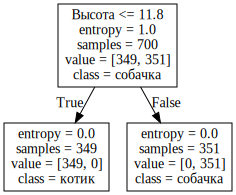

In [70]:
graph = Source(tree.export_graphviz(Tree_classifer_object, out_file=None,
                                    feature_names = feature_cols,
                                    class_names=['котик','собачка']))
display(SVG(graph.pipe(format='svg')))

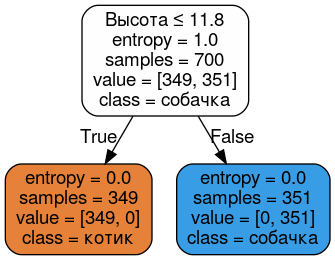

In [71]:
#or we can visualize like this:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

    
dot_data = StringIO()
export_graphviz(Tree_classifer_object, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['котик','собачка'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cat_dog.png')
Image(graph.create_png())

In [78]:
import json

In [23]:
data = pd.read_json('/home/sedreh/ITMO/semester2/Biopython/session10/dataset_209691_15.json', 'r')

In [24]:
data = pd.DataFrame(data)

In [25]:

data.head(10)

,Высота,Гавкает,Длина,Лазает по деревьям,Шерстист
0,30.0,1,25,0,1
1,40.8,1,34,0,1
10,27.6,1,23,0,1
11,27.6,1,23,0,1
12,24.0,0,20,0,1
13,22.8,1,19,0,1
14,27.6,1,23,0,1
15,24.0,1,20,0,1
16,34.8,1,29,0,1
17,25.2,0,21,0,1


In [26]:
data = data.reindex(columns = ['Длина', 'Высота', 'Шерстист', 'Гавкает','Лазает по деревьям'])

In [27]:
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,34,40.8,1,1,0
10,23,27.6,1,1,0
11,23,27.6,1,1,0
12,20,24.0,1,0,0


In [28]:
y_pred2 = Tree_classifer_object.predict(data)

In [29]:
print(y_pred2)

['собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'котик'
 'котик' 'котик' 'котик' 'собачка' 'котик' 'котик' 'котик' 'котик' 'котик'
 'котик' 'котик' 'котик' 'котик' 'котик' 'собачка' 'котик' 'котик' 'котик'
 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'собачка' 'котик'
 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик'
 'собачка' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик'
 'котик' 'котик' 'собачка' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик'
 'котик' 'котик' 'котик' 'котик']


In [35]:
value = y_pred2.tolist()

In [36]:
value.count('собачка')

46

In [37]:
value.count('котик')

54